#helper functions!

num_of_tests = 10


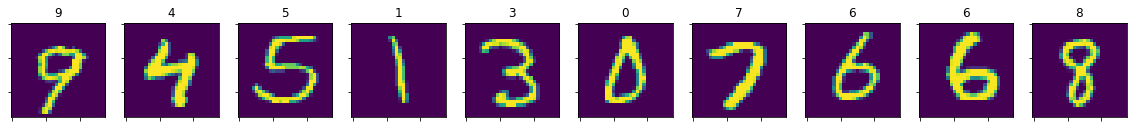

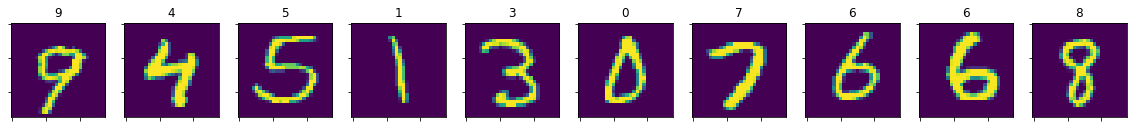

In [1]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import torch


def show_images_return_from_testing(count_of_images):
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    print(f'{num_of_tests = }')

    for indx in range(num_of_tests):
        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(int(labels[indx]))

    for indx in range(num_of_tests):
        axs2[indx].set_yticklabels([])  # x-axis
        axs2[indx].set_xticklabels([])  # y-axis
        axs2[indx].imshow(testing_images[indx, 0, :, :])
        axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


# testing_images, labels = show_images_from_testing(10)
_, _ = show_images_return_from_testing(10)


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [28, 28]

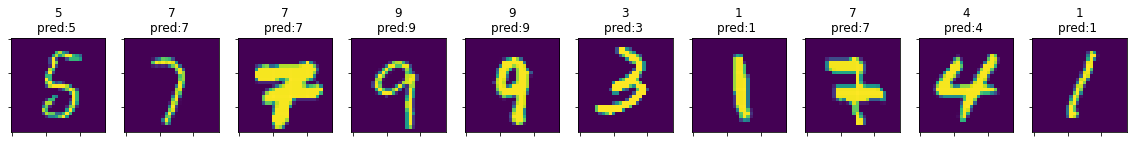

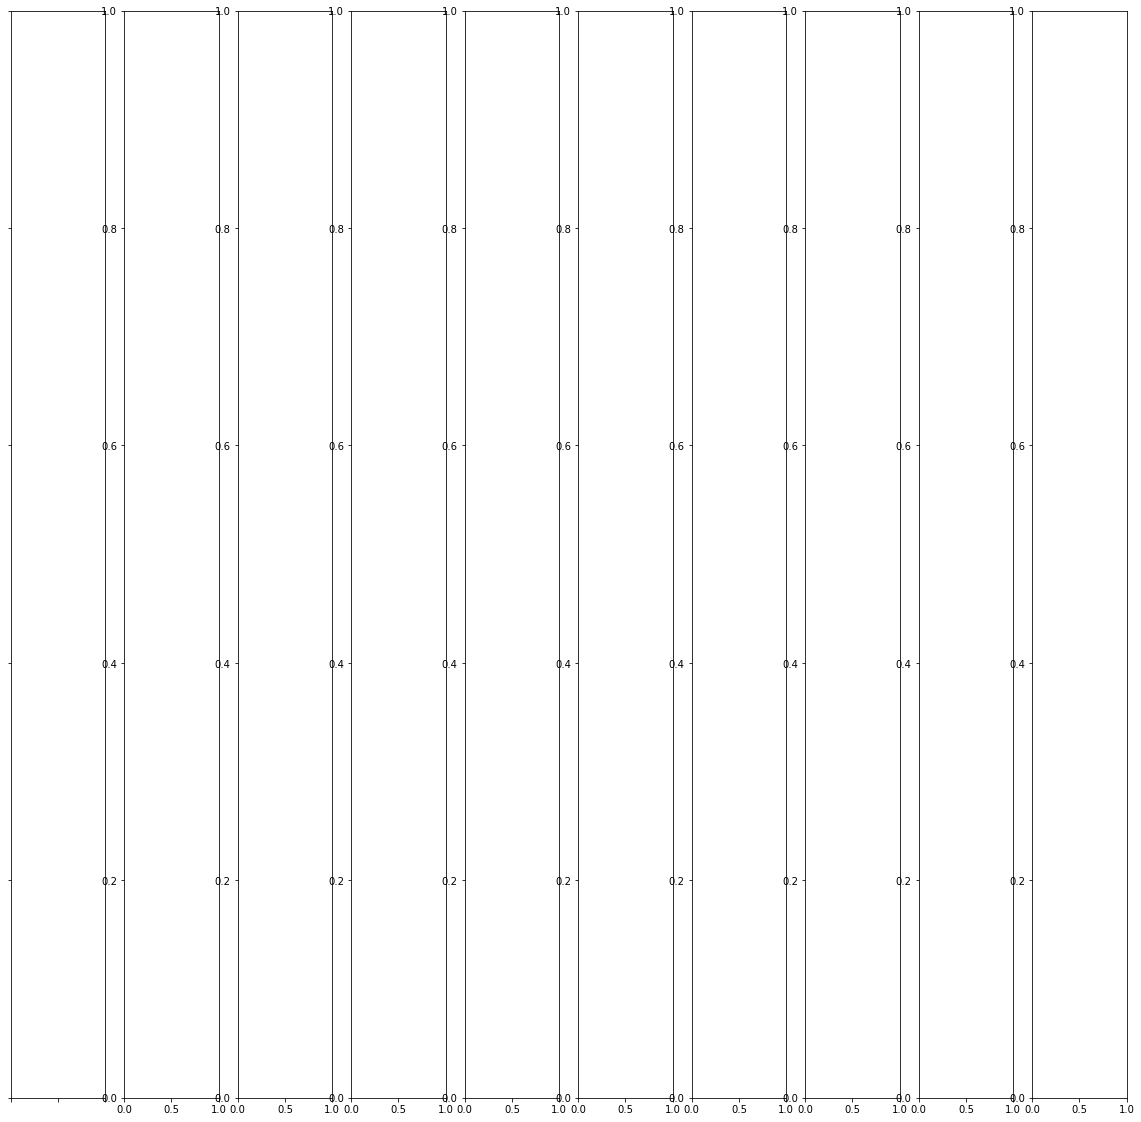

In [13]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from VAE import AE2
from VAE import AE
from model import MyModel5

# PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'
#
# model_vae = AE()
# model_vae.load_state_dict(torch.load(PATH_VAE))
# model_vae.eval()

PATH_weight_classify = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_model_classifier'
model_classify = MyModel5()
model_classify.load_state_dict(torch.load(PATH_weight_classify))
model_classify.eval()


def show_images_with_model(count_of_images=5, model=model_classify):
    model.eval()
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    # fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    # print(f'{num_of_tests = }')
    PRED_bool = True
    if PRED_bool:
        pred = model(testing_images)
        # print(pred.shape)
        # print(pred)
    for indx in range(num_of_tests):
        title = str(int(labels[indx])) + '\npred:'
        if PRED_bool:
            pred_acc = pred[indx]
            pred_nr = int(pred_acc.argmax())
            acc = pred_acc[pred_nr]
            title += str(pred_nr) + ' '
            # title += str(int(acc)) # TODO add later as accuracy

        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(title)
        # axs[indx].set_title(int(labels[indx]))

    # for indx in range(num_of_tests):
    #     axs2[indx].set_yticklabels([])  # x-axis
    #     axs2[indx].set_xticklabels([])  # y-axis
    #     pred = model(testing_images[indx, 0, :, :])
    #     axs2[indx].imshow(pred)
    #     # axs2[indx].imshow(testing_images[indx, 0, :, :])
    #     axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


# testing_images, labels = show_images_return_from_testing(10)
# _, _ = show_images_return_from_testing(10)
_, _ = show_images_with_model(10)


Programm

In [14]:
# import torch
# from VAE import VAE
# from VAE import AE_relu
#
# # from VAE import VAE
#
# PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'
#
# model_vae = AE_relu()
# model_vae.load_state_dict(torch.load(PATH_VAE))
# model_vae.eval()
# testing_images, labels = show_images_return_from_testing(10)
# print(testing_images[0])
# testing_images = testing_images / 255
# #TODO Preproccesing for images needed !!!
# print(testing_images[0])
# enc = model_vae.encoder(testing_images[0])
# dec = model_vae.decoder(enc)
# print(f'{enc.shape= }')
# print(f'{enc = }')
# print(f'{dec.shape  = }')
# print(f'{dec  = }')

In [15]:
import torch
import model


def import_model_name(model_name, model_x, activate_eval=True):
    save_name_model = model_name + '_weights'
    PATH = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/' + save_name_model
    model_x.load_state_dict(torch.load(PATH))
    if activate_eval: model_x.eval()
    return model_x


# MODEL_NAME = 'CNN_6_CONV'
# model_y = import_model_name(MODEL_NAME)
# SAVE_NAME_MODEL = MODEL_NAME + '_weights'
#
#
# PATH = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/'+SAVE_NAME_MODEL
#
# model_x = model.CNN_6_CONV()
# model_x.load_state_dict(torch.load(PATH))
# model_x.eval()
_, _ = show_images_with_model(20, model=model_y)

NameError: name 'model_y' is not defined

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x5)

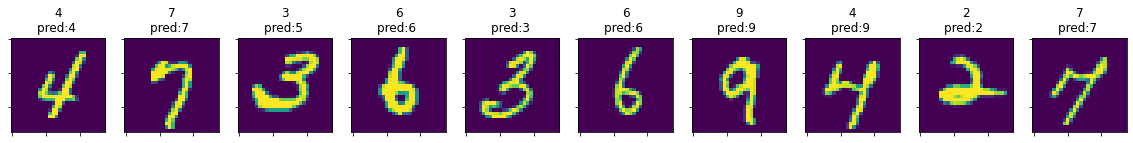

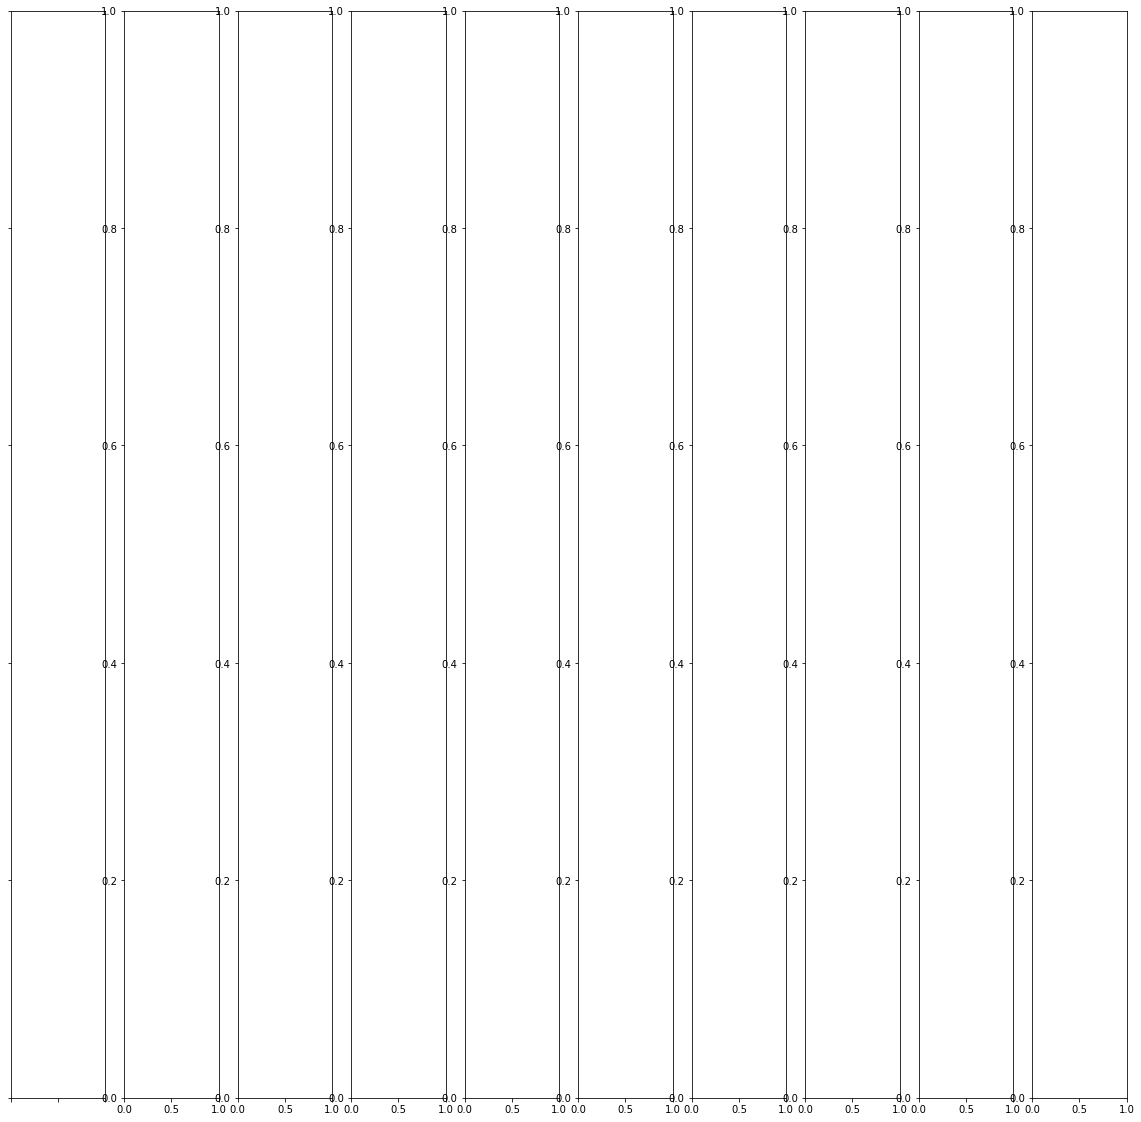

In [17]:
from model import autoencoder_h5_n

model_name_run_name = 'autoencoder_h5_n_weights_fin_acc89'
# model_name_run_name = 'autoencoder_h5_n'
# model_loaded = model.autoencoder_h5_n()
model_loaded = model.autoencoder_h5_n_weights_fin_acc89()
model_loaded = import_model_name(model_name=model_name_run_name, model_x=model_loaded, activate_eval=True)
images, labels = show_images_with_model(10,model = model_loaded)
x = model_loaded(images[0])
print(x)
